In [1]:
using HTTP, Dates, DataFrames, StatsPlots, Indicators, Pipe
import JSON3

# how many days to show
days = 100

function get_df(url, days)
    df = @pipe url |> HTTP.get |> _.body |> String |> JSON3.read |> _.features |>
        getindex.(_, :attributes) |> DataFrame |> something.(_, NaN16) |> sort!(_, :DATE) |> last(_, days)
    df.DATE = df.DATE ./ 1000 .|> Dates.unix2datetime
    df
end

dane_url = "https://dhsgis.wi.gov/server/rest/services/DHS_COVID19/COVID19_WI/MapServer/12/query?where=NAME%20%3D%20%27DANE%27&outFields=POS_NEW,TEST_NEW,DATE,DTH_NEW&outSR=4326&f=json"
dane_df = get_df(dane_url, days)

theme(:bright)
@df dane_df bar(:DATE, :POS_NEW, ylim = (0, Inf), label = "daily new positives", title = "Dane new positives", legend = :topleft)
@df dane_df plot!(:DATE, sma(:POS_NEW; n = 7), linewidth = 3, label = "weekly moving average")

In [2]:
@df dane_df plot(:DATE, :POS_NEW ./ :TEST_NEW, label = nothing, title = "Dane positive rate", linewidth = 3, legend = :topleft)
@df dane_df plot!(:DATE, sma(:POS_NEW ./ :TEST_NEW; n = 7), label = "weekly moving average", linewidth = 3)

In [3]:
wi_url = "https://dhsgis.wi.gov/server/rest/services/DHS_COVID19/COVID19_WI/MapServer/11/query?where=1%3D1&outFields=DATE,POS_NEW,DTH_NEW,TEST_NEW,NAME&outSR=4326&f=json"
wi_df = get_df(wi_url, days)

@df wi_df bar(:DATE, :POS_NEW, ylim = (0, Inf), label = "daily new positives", title = "WI new positives", legend = :topleft)
@df wi_df plot!(:DATE, sma(:POS_NEW; n = 7), linewidth = 3, label = "weekly moving average")

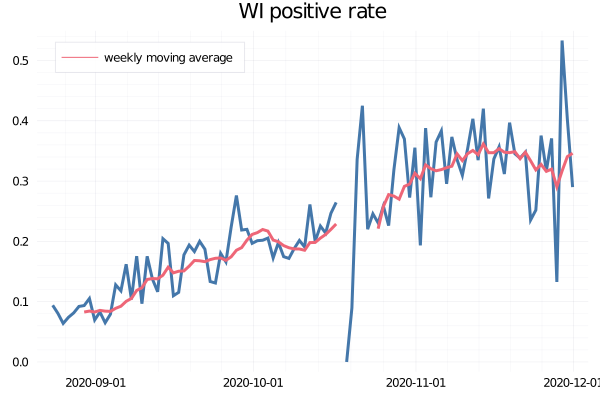

In [4]:
@df wi_df plot(:DATE, :POS_NEW ./ :TEST_NEW, title = "WI positive rate", linewidth = 3, label = nothing, legend = :topleft)
@df wi_df plot!(:DATE, sma(:POS_NEW ./ :TEST_NEW; n = 7), label = "weekly moving average", linewidth = 3)

In [5]:
theme(:wong2)
@df wi_df bar(:DATE, :DTH_NEW, title = "WI new deaths", label = "daily new deaths", ylim = (0, Inf), legend = :topleft)
@df wi_df plot!(:DATE, sma(:DTH_NEW; n = 7), linewidth = 3, label = "weekly moving average")